In [ ]:
!pip install tweepy

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from keras.layers import Dropout
from nltk.tokenize import TweetTokenizer

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/finalSentimentdata2.csv')

In [ ]:
df.head()

,Unnamed: 0,category,tweet
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [ ]:
print("Total number of records in data: ",len(df))

Total number of records in data:  3090


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 1   category    3090 non-null   object
 2   tweet       3090 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.5+ KB


Missing Values

In [ ]:
df.isna().sum()

Unnamed: 0    0
category      0
tweet         0
dtype: int64

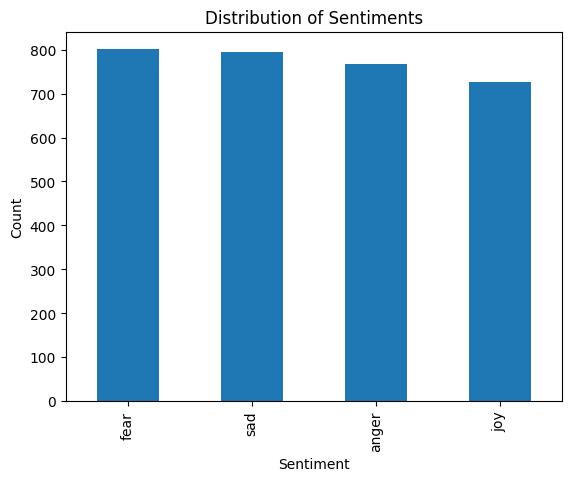

In [ ]:
df['category'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

#Text Pre-Processing

In [ ]:
df["tweet"] = df["tweet"].astype(str)

**Lower Casing**

In [ ]:
df["processed_tweets"] = df["tweet"].str.lower()
df.head()

,Unnamed: 0,category,tweet,processed_tweets
0,3204,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...


In [ ]:
print("\nOriginal Tweet:",df['tweet'][0])
print(df['processed_tweets'][0])


Original Tweet: agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals
agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals


In [ ]:
len(df['processed_tweets'])

3090

**Removal of @ and User names**

In [ ]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):
  result = tknzr.tokenize(df['processed_tweets'][a])
  res=" ".join(result)
  df['processed_tweets'][a]=res
print("\nTokenize a twitter text:")
print(df['processed_tweets'])

<ipython-input-15-dd4324202416>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=res



Tokenize a twitter text:
0       agree the poor in india are treated badly thei...
1       if only i could have spent the with this cutie...
2       will nature conservation remain a priority in ...
3       coronavirus disappearing in italy show this to...
4       uk records lowest daily virus death toll since...
                              ...                        
3085    today at 02 30pm a 54 year old bangladeshi mal...
3086    corona virus i implore that you cease activity...
3087    issa date once lockdown ends inshaallah ( and ...
3088    the death toll due to covid 19 rose to 31 in j...
3089    the rates are become barrier for poor people t...
Name: processed_tweets, Length: 3090, dtype: object


In [ ]:
df.head()

,Unnamed: 0,category,tweet,processed_tweets
0,3204,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,category,tweet,processed_tweets
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...


**Remove Punctuations**

In [ ]:
# drop the new column created in last cell

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["processed_tweets"] = df["processed_tweets"].apply(lambda text: remove_punctuation(text))
df.head()

,category,tweet,processed_tweets
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...


**Remove URLs**

In [ ]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [ ]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):

  result = remove_URL(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No URLs:")
print(result)

No URLs:
the rates are become barrier for poor people to think from cure treatment and remedy from covid 19 …


In [ ]:
df.head()

,category,tweet,processed_tweets
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...


**Remove Emojis**

In [ ]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("Patients are having fever🔥🔥")

'Patients are having fever'

In [ ]:
for a in range(len(df['processed_tweets'])):
  result = remove_emoji(df['processed_tweets'][a])
  df['processed_tweets'][a]=result

**Removal of Emoticons**

In [ ]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [ ]:
for a in range(len(df['processed_tweets'])):
  result = remove_emoticons(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No Emoticons:")
print(result)

No Emoticons:
the rates are become barrier for poor people to think from cure treatment and remedy from covid 19 …


In [ ]:
df.head()

,category,tweet,processed_tweets
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...


In [ ]:
df.isna().sum()

category            0
tweet               0
processed_tweets    0
dtype: int64

**Labelling the target fields**

In [ ]:
df['category'].value_counts()

fear     801
sad      795
anger    767
joy      727
Name: category, dtype: int64

In [ ]:
df['category'].value_counts()

fear     801
sad      795
anger    767
joy      727
Name: category, dtype: int64

In [ ]:
import os
import re

import numpy as np
import tensorflow as tf

# np.random.seed(1)
# tf.set_random_seed(2)

import pandas as pd
import keras
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

**Stop words**

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


 #apply function
df['processed_tweets'] = df['processed_tweets'].apply(lambda text: cleaning_stopwords(text))
df['processed_tweets'].head()

0    agree poor india treated badly poors seek livi...
1    could spent cutie vc sakshis n g h coast cross...
2    nature conservation remain priority post coron...
3    coronavirus disappearing italy show intellectu...
4    uk records lowest daily virus death toll since...
Name: processed_tweets, dtype: object

In [ ]:
dataset = df.drop('tweet',axis=1)
dataset

,category,processed_tweets
0,sad,agree poor india treated badly poors seek livi...
1,joy,could spent cutie vc sakshis n g h coast cross...
2,joy,nature conservation remain priority post coron...
3,sad,coronavirus disappearing italy show intellectu...
4,sad,uk records lowest daily virus death toll since...
...,...,...
3085,sad,today 02 30pm 54 year old bangladeshi male adm...
3086,anger,corona virus implore cease activity april 1st ...
3087,joy,issa date lockdown ends inshaallah corona redh...
3088,sad,death toll due covid 19 rose 31 jammu kashmir ...


**Lemmentization**

In [ ]:
import nltk
nltk.download('wordnet')


lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['processed_tweets'] = df['processed_tweets'].apply(lambda x: lemmatizer_on_text(x))
df['processed_tweets'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


0    agree poor india treated badly poors seek livi...
1    could spent cutie vc sakshis n g h coast cross...
2    nature conservation remain priority post coron...
3    coronavirus disappearing italy show intellectu...
4    uk records lowest daily virus death toll since...
Name: processed_tweets, dtype: object

In [ ]:
X = df['processed_tweets']
y = df['category']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,random_state = 42, test_size=0.2)

In [ ]:
df.head()

,category,tweet,processed_tweets
0,sad,agree the poor in india are treated badly thei...,agree poor india treated badly poors seek livi...
1,joy,if only i could have spent the with this cutie...,could spent cutie vc sakshis n g h coast cross...
2,joy,will nature conservation remain a priority in ...,nature conservation remain priority post coron...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing italy show intellectu...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...


In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.category.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (2472, 3)
valid shape :  (618, 3)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
vectorizer = CountVectorizer(decode_error = 'replace')

X_train = vectorizer.fit_transform(train.processed_tweets.values)
X_valid = vectorizer.transform(valid.processed_tweets.values)

y_train = train.category.values
y_valid = valid.category.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (2472, 9256)
X_train.shape :  (618, 9256)
y_train.shape :  (2472,)
y_valid.shape :  (618,)


#Modelling

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.9534789644012945
Validation accuracy Score :  0.6796116504854369
              precision    recall  f1-score   support

       anger       0.56      0.65      0.61       133
        fear       0.62      0.58      0.60       173
         joy       0.71      0.82      0.76       126
         sad       0.82      0.70      0.75       186

    accuracy                           0.68       618
   macro avg       0.68      0.69      0.68       618
weighted avg       0.69      0.68      0.68       618



Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9995954692556634
Validation accuracy Score :  0.6909385113268608
              precision    recall  f1-score   support

       anger       0.66      0.60      0.63       171
        fear       0.51      0.65      0.57       127
         joy       0.85      0.70      0.77       175
         sad       0.75      0.83      0.79       145

    accuracy                           0.69       618
   macro avg       0.69      0.69      0.69       618
weighted avg       0.71      0.69      0.69       618



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.6213592233009708
              precision    recall  f1-score   support

       anger       0.63      0.53      0.57       184
        fear       0.37      0.69      0.48        85
         joy       0.82      0.55      0.66       216
         sad       0.69      0.82      0.75       133

    accuracy                           0.62       618
   macro avg       0.63      0.65      0.62       618
weighted avg       0.67      0.62      0.63       618



Extreme Gradient Boosting

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

#xgboost_clf.fit(X_train, y_train)

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels in y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Now, y_train_encoded contains numerical labels suitable for XGBoost
xgboost_clf.fit(X_train, y_train_encoded)




xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
#print(classification_report(xgb_prediction,y_valid))

# Transform y_valid using the label encoder
y_valid_encoded = label_encoder.transform(y_valid)

# Now you can print the classification report
print(classification_report(xgb_prediction, y_valid_encoded))

Training accuracy Score    :  0.0
Validation accuracy Score :  0.0
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       154
           1       0.55      0.69      0.61       127
           2       0.77      0.66      0.71       170
           3       0.80      0.76      0.78       167

    accuracy                           0.68       618
   macro avg       0.68      0.68      0.68       618
weighted avg       0.70      0.68      0.69       618



After hyper-parameter tuning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, y_train, X_valid, y_valid are defined

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels in y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Create an XGBoost classifier
xgboost_clf = xgb.XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    # Add more hyperparameters as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train_encoded)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_xgboost_clf = grid_search.best_estimator_
xgb_prediction = best_xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid, xgb_prediction)

print("Training accuracy Score    : ", best_xgboost_clf.score(X_train, y_train_encoded))
print("Validation accuracy Score : ", xgb_accuracy)

# Transform y_valid using the label encoder
y_valid_encoded = label_encoder.transform(y_valid)

# Now you can print the classification report
print(classification_report(xgb_prediction, y_valid_encoded))


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Training accuracy Score    :  0.9077669902912622
Validation accuracy Score :  0.0
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       158
           1       0.52      0.69      0.59       121
           2       0.80      0.65      0.72       179
           3       0.79      0.79      0.79       160

    accuracy                           0.68       618
   macro avg       0.68      0.68      0.68       618
weighted avg       0.70      0.68      0.68       618

